In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Jawa Timur.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  365 non-null    datetime64[ns]
 1   Tn       355 non-null    float64       
 2   Tx       360 non-null    float64       
 3   Tavg     361 non-null    float64       
 4   RH_avg   360 non-null    float64       
 5   RR       108 non-null    float64       
 6   ss       359 non-null    float64       
 7   ff_x     363 non-null    float64       
 8   ddd_x    362 non-null    float64       
 9   ff_avg   363 non-null    float64       
 10  ddd_car  363 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.5+ KB


<ipython-input-2-0a9248b11350>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,NaN,24.4,6.0,22.4
1,2023-02-01,21.0,27.6,0.6,23.3
2,2023-03-01,21.0,28.2,8888.0,24.8
3,2023-04-01,22.0,28.7,NaN,25.4
4,2023-05-01,21.0,29.0,NaN,24.0
...,...,...,...,...,...
360,2023-12-16,20.4,30.8,NaN,25.5
361,2023-12-17,21.2,30.2,NaN,25.6
362,2023-12-18,21.0,33.8,NaN,24.9
363,2023-12-19,20.4,30.4,NaN,25.2


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

22

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,NaN,24.4,6.0,22.4
1,31,31,2023-01-02,NaN,28.6,6.0,23.6
2,59,60,2023-01-03,20.8,27.2,105.0,24.1
3,90,92,2023-01-04,20.0,26.5,6.0,21.8
4,120,123,2023-01-05,21.0,29.6,4.0,24.6
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,20.4,30.8,NaN,25.5
350,350,361,2023-12-17,21.2,30.2,NaN,25.6
351,351,362,2023-12-18,21.0,33.8,NaN,24.9
352,352,363,2023-12-19,20.4,30.4,NaN,25.2


In [8]:
#cek null
df1.isnull().sum()

level_0      0
index        0
Tanggal      0
Tn           9
Tx           5
RR         251
Tavg         4
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       4
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

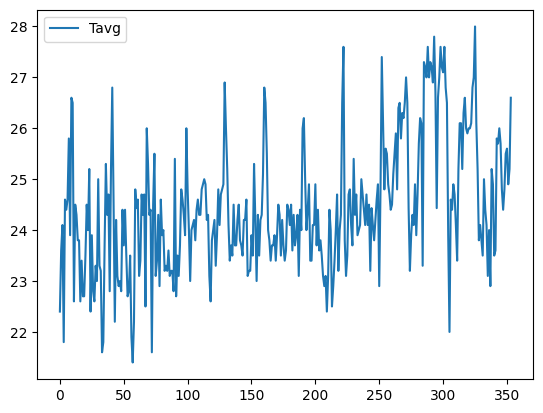

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

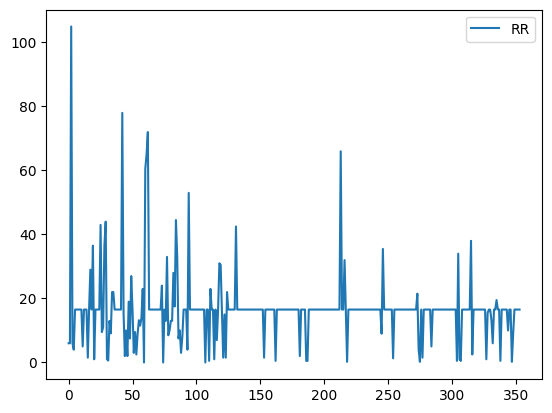

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    print(row)

level_0                     59
index                       60
Tanggal    2023-01-03 00:00:00
Tn                        20.8
Tx                        27.2
RR                       105.0
Tavg                      24.1
Name: 2, dtype: object


In [14]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

In [15]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,20.41971,24.4,6.000000,22.4,28.6,23.6,6.000000
1,31,31,2023-01-02,20.41971,28.6,6.000000,23.6,27.2,24.1,6.000000
2,59,60,2023-01-03,20.80000,27.2,6.000000,24.1,26.5,21.8,6.000000
3,90,92,2023-01-04,20.00000,26.5,6.000000,21.8,29.6,24.6,4.000000
4,120,123,2023-01-05,21.00000,29.6,4.000000,24.6,30.0,24.4,16.538835
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,20.40000,30.8,16.538835,25.5,30.2,25.6,16.538835
350,350,361,2023-12-17,21.20000,30.2,16.538835,25.6,33.8,24.9,16.538835
351,351,362,2023-12-18,21.00000,33.8,16.538835,24.9,30.4,25.2,16.538835
352,352,363,2023-12-19,20.40000,30.4,16.538835,25.2,31.0,26.6,16.538835


In [16]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,6.000000,22.4,23.6,6.000000
1,6.000000,23.6,24.1,6.000000
2,6.000000,24.1,21.8,6.000000
3,6.000000,21.8,24.6,4.000000
4,4.000000,24.6,24.4,16.538835
...,...,...,...,...
349,16.538835,25.5,25.6,16.538835
350,16.538835,25.6,24.9,16.538835
351,16.538835,24.9,25.2,16.538835
352,16.538835,25.2,26.6,16.538835


In [17]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,6.000000,22.4,23.6,6.000000
1,6.000000,23.6,24.1,6.000000
2,6.000000,24.1,21.8,6.000000
3,6.000000,21.8,24.6,4.000000
4,4.000000,24.6,24.4,16.538835
...,...,...,...,...
348,9.000000,24.8,25.5,16.538835
349,16.538835,25.5,25.6,16.538835
350,16.538835,25.6,24.9,16.538835
351,16.538835,24.9,25.2,16.538835


In [18]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,6.000000,22.4,23.6,6.000000,0
1,6.000000,23.6,24.1,6.000000,1
2,6.000000,24.1,21.8,6.000000,2
3,6.000000,21.8,24.6,4.000000,3
4,4.000000,24.6,24.4,16.538835,4
...,...,...,...,...,...
348,9.000000,24.8,25.5,16.538835,348
349,16.538835,25.5,25.6,16.538835,349
350,16.538835,25.6,24.9,16.538835,350
351,16.538835,24.9,25.2,16.538835,351


In [20]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [21]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [22]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
X_test

,Indeks,Tavg
282,282,26.2
283,283,26.1
284,284,23.3
285,285,27.3
286,286,27.2
...,...,...
348,348,24.8
349,349,25.5
350,350,25.6
351,351,24.9


In [24]:
#testing
pred1 = lr.predict(X_test)
pred1

array([25.35131994, 25.31278703, 24.16709097, 25.80980582, 25.77127291,
       25.69173396, 25.94024335, 25.69668023, 25.8221715 , 25.78363859,
       25.6630936 , 26.03462112, 25.58602779, 24.65848388, 25.54996802,
       25.71646533, 25.96497472, 25.80342369, 25.76489078, 25.97239413,
       25.64681892, 25.52627393, 24.46258996, 23.68594828, 24.75457853,
       24.67503958, 24.88254293, 24.80300398, 24.55944086, 24.2748717 ,
       25.01545361, 25.38698113, 25.38945427, 25.02287302, 25.47641262,
       25.60190389, 25.35834077, 25.31980786, 25.36328704, 25.36576018,
       25.40923936, 25.69875479, 25.78324002, 26.19577358, 25.4191319 ,
       25.05255066, 24.48093919, 24.60643046, 24.48588547, 24.36534048,
       24.98290425, 24.73934113, 24.61879614, 24.21120885, 24.58273637,
       24.13414304, 25.07975516, 24.95921017, 24.38759871, 24.43107789,
       25.33568396, 25.29715106, 25.42264232, 25.30209733, 24.93551608,
       24.77396505, 24.94046235, 25.22997779, 25.27345697, 24.98

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9996805013038732 1.396675584371065


In [26]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,26.2
283,283,26.1
284,284,23.3
285,285,27.3
286,286,27.2
...,...,...
348,348,24.8
349,349,25.5
350,350,25.6
351,351,24.9


In [27]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,25.351320
283,25.312787
284,24.167091
285,25.809806
286,25.771273
...,...
348,24.940462
349,25.229978
350,25.273457


In [28]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-28-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,22.4,NaN
1,23.6,NaN
2,24.1,NaN
3,21.8,NaN
4,24.6,NaN
...,...,...
348,24.8,24.940462
349,25.5,25.229978
350,25.6,25.273457
351,24.9,24.988888


<Axes: >

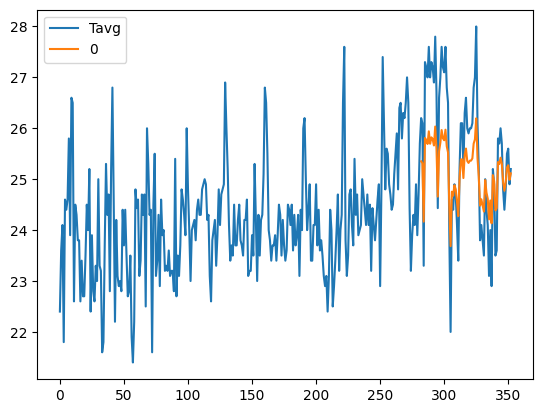

In [29]:
kan.plot()

In [30]:
new_data = [[354, 25.2],[355, 25.2],[356, 25.2],[357, 25.2],[358, 25.2],[359, 25.2],[360, 25.2]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.11932535, 25.12179848, 25.12427162, 25.12674475, 25.12921789,
       25.13169103, 25.13416416])

In [31]:
kan.to_json('Prediksi Jawa Timur.json')